In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_decision_regions

In [6]:
features = np.load("./datasets/mcp_iris/features.npy")
targets = np.load("./datasets/mcp_iris/targets.npy")

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, random_state=1, stratify=targets)

In [31]:
class Adaline(object):
    
    def __init__(self, feature_size):
        self.weights = np.zeros(1 + feature_size)
        self.acc = 0.0
        self.history = None
        
    def forward(self, input):
        return np.dot(input, self.weights[1:]) + self.weights[0]
    
    def activation(self, input):
        return self.forward(input)
    
    def predict(self, input):
        return np.where(self.activation(input) >= 0, 1, -1)
        
    def fit(self, X_train, y_train, X_test, y_test, epochs=10, lr=0.0001, verbose=False):
        history = {'acc': [], 'loss': []}
        
        for e in range(1, epochs + 1):
            output = self.forward(X_train)
            errors = (y_train - output)
            
            self.weights[1:] += lr * np.dot(X_train.T, errors)
            self.weights[0] += lr * errors.sum()
            
            loss = (errors ** 2).sum() / 2.0
            acc = accuracy_score(y_test, self.predict(X_test))
            history['loss'].append(loss)
            history['acc'].append(acc)
            print(self.weights)
            
        self.history = history
        return self

In [45]:
un_trained_perceptron = Adaline(feature_size=2)
trained_perceptron = Adaline(feature_size=2).fit(X_train, y_train,X_test, y_test, epochs=5000)

[-0.0001   0.00275 -0.00274]
[-0.00024752  0.00523359 -0.00562141]
[-0.0004281   0.00752992 -0.00859936]
[-0.00063163  0.00969424 -0.01164251]
[-0.00085105  0.01176514 -0.014729  ]
[-0.00108144  0.01376956 -0.01784356]
[-0.00131937  0.01572631 -0.02097555]
[-0.00156243  0.01764852 -0.02411753]
[-0.00180895  0.01954536 -0.02726432]
[-0.00205776  0.02142325 -0.03041231]
[-0.00230804  0.02328665 -0.03355898]
[-0.00255923  0.0251387  -0.03670257]
[-0.00281093  0.02698159 -0.03984188]
[-0.00306286  0.02881684 -0.04297604]
[-0.00331482  0.03064552 -0.04610449]
[-0.00356669  0.03246838 -0.0492268 ]
[-0.00381837  0.03428595 -0.05234271]
[-0.00406979  0.0360986  -0.05545202]
[-0.00432091  0.0379066  -0.05855462]
[-0.0045717   0.03971012 -0.06165041]
[-0.00482213  0.0415093  -0.06473933]
[-0.0050722   0.04330423 -0.06782137]
[-0.00532188  0.04509499 -0.0708965 ]
[-0.00557118  0.04688161 -0.0739647 ]
[-0.00582009  0.04866416 -0.07702599]
[-0.00606861  0.05044264 -0.08008037]
[-0.00631673  0.05221

[-0.11121923  0.65288307 -1.10804351]
[-0.11133123  0.65330686 -1.10875438]
[-0.11144314  0.65372971 -1.10946363]
[-0.11155494  0.65415163 -1.11017125]
[-0.11166666  0.65457261 -1.11087725]
[-0.11177827  0.65499265 -1.11158164]
[-0.11188979  0.65541176 -1.11228441]
[-0.11200122  0.65582994 -1.11298558]
[-0.11211254  0.65624719 -1.11368514]
[-0.11222378  0.65666352 -1.1143831 ]
[-0.11233492  0.65707893 -1.11507947]
[-0.11244596  0.65749341 -1.11577424]
[-0.11255691  0.65790697 -1.11646742]
[-0.11266777  0.65831962 -1.11715901]
[-0.11277853  0.65873135 -1.11784902]
[-0.1128892   0.65914217 -1.11853746]
[-0.11299977  0.65955208 -1.11922431]
[-0.11311025  0.65996107 -1.1199096 ]
[-0.11322064  0.66036916 -1.12059331]
[-0.11333093  0.66077635 -1.12127546]
[-0.11344114  0.66118263 -1.12195605]
[-0.11355124  0.66158801 -1.12263508]
[-0.11366126  0.6619925  -1.12331256]
[-0.11377118  0.66239608 -1.12398848]
[-0.11388102  0.66279878 -1.12466286]
[-0.11399076  0.66320057 -1.12533569]
[-0.11410041

[-0.17313695  0.80297636 -1.35263792]
[-0.17321427  0.80307272 -1.35278285]
[-0.17329157  0.80316889 -1.35292743]
[-0.17336885  0.80326485 -1.35307167]
[-0.1734461   0.80336062 -1.35321556]
[-0.17352333  0.80345618 -1.3533591 ]
[-0.17360054  0.80355155 -1.35350231]
[-0.17367772  0.80364671 -1.35364517]
[-0.17375488  0.80374168 -1.35378769]
[-0.17383202  0.80383645 -1.35392987]
[-0.17390914  0.80393103 -1.3540717 ]
[-0.17398623  0.80402541 -1.3542132 ]
[-0.1740633   0.80411959 -1.35435436]
[-0.17414035  0.80421358 -1.35449519]
[-0.17421737  0.80430737 -1.35463567]
[-0.17429437  0.80440096 -1.35477582]
[-0.17437135  0.80449436 -1.35491564]
[-0.17444831  0.80458757 -1.35505512]
[-0.17452525  0.80468059 -1.35519426]
[-0.17460216  0.80477341 -1.35533307]
[-0.17467905  0.80486603 -1.35547155]
[-0.17475592  0.80495847 -1.3556097 ]
[-0.17483277  0.80505071 -1.35574752]
[-0.17490959  0.80514277 -1.35588501]
[-0.17498639  0.80523463 -1.35602216]
[-0.17506317  0.8053263  -1.35615899]
[-0.17513993

[-0.22267742  0.83918883 -1.40049623]
[-0.22274564  0.83921498 -1.40052032]
[-0.22281385  0.83924108 -1.40054434]
[-0.22288205  0.83926713 -1.40056828]
[-0.22295024  0.83929315 -1.40059216]
[-0.22301843  0.83931912 -1.40061595]
[-0.22308661  0.83934505 -1.40063968]
[-0.22315478  0.83937094 -1.40066334]
[-0.22322295  0.83939679 -1.40068692]
[-0.22329111  0.8394226  -1.40071044]
[-0.22335926  0.83944836 -1.40073388]
[-0.2234274   0.83947408 -1.40075725]
[-0.22349554  0.83949976 -1.40078055]
[-0.22356367  0.8395254  -1.40080378]
[-0.22363179  0.839551   -1.40082694]
[-0.22369991  0.83957656 -1.40085003]
[-0.22376802  0.83960207 -1.40087304]
[-0.22383612  0.83962754 -1.40089599]
[-0.22390421  0.83965298 -1.40091887]
[-0.2239723   0.83967837 -1.40094168]
[-0.22404038  0.83970372 -1.40096442]
[-0.22410845  0.83972903 -1.40098709]
[-0.22417652  0.8397543  -1.40100969]
[-0.22424458  0.83977953 -1.40103222]
[-0.22431263  0.83980472 -1.40105468]
[-0.22438068  0.83982987 -1.40107707]
[-0.22444871

[-0.26839167  0.85080271 -1.40623055]
[-0.26845633  0.8508139  -1.40622942]
[-0.26852098  0.85082507 -1.40622827]
[-0.26858564  0.85083624 -1.40622711]
[-0.26865028  0.8508474  -1.40622594]
[-0.26871493  0.85085855 -1.40622475]
[-0.26877957  0.85086969 -1.40622355]
[-0.26884421  0.85088082 -1.40622233]
[-0.26890884  0.85089194 -1.4062211 ]
[-0.26897347  0.85090305 -1.40621985]
[-0.26903809  0.85091415 -1.40621859]
[-0.26910272  0.85092525 -1.40621731]
[-0.26916733  0.85093633 -1.40621602]
[-0.26923195  0.85094741 -1.40621471]
[-0.26929656  0.85095848 -1.40621339]
[-0.26936116  0.85096953 -1.40621206]
[-0.26942577  0.85098058 -1.40621071]
[-0.26949037  0.85099162 -1.40620935]
[-0.26955496  0.85100266 -1.40620797]
[-0.26961955  0.85101368 -1.40620658]
[-0.26968414  0.85102469 -1.40620517]
[-0.26974872  0.8510357  -1.40620375]
[-0.2698133   0.85104669 -1.40620231]
[-0.26987788  0.85105768 -1.40620086]
[-0.26994245  0.85106866 -1.4061994 ]
[-0.27000702  0.85107963 -1.40619792]
[-0.27007158

[-0.31179831  0.85706319 -1.40327283]
[-0.31186065  0.85707107 -1.40326662]
[-0.31192299  0.85707894 -1.40326041]
[-0.31198533  0.85708682 -1.4032542 ]
[-0.31204766  0.85709469 -1.40324798]
[-0.31210999  0.85710257 -1.40324177]
[-0.31217232  0.85711044 -1.40323555]
[-0.31223464  0.8571183  -1.40322932]
[-0.31229696  0.85712617 -1.4032231 ]
[-0.31235928  0.85713403 -1.40321687]
[-0.3124216   0.85714189 -1.40321064]
[-0.31248391  0.85714975 -1.4032044 ]
[-0.31254622  0.85715761 -1.40319816]
[-0.31260852  0.85716546 -1.40319192]
[-0.31267083  0.85717332 -1.40318568]
[-0.31273313  0.85718117 -1.40317943]
[-0.31279542  0.85718901 -1.40317319]
[-0.31285772  0.85719686 -1.40316693]
[-0.31292001  0.8572047  -1.40316068]
[-0.31298229  0.85721255 -1.40315442]
[-0.31304458  0.85722039 -1.40314816]
[-0.31310686  0.85722822 -1.4031419 ]
[-0.31316914  0.85723606 -1.40313563]
[-0.31323141  0.85724389 -1.40312937]
[-0.31329369  0.85725172 -1.4031231 ]
[-0.31335596  0.85725955 -1.40311682]
[-0.31341822

[-0.353925    0.86211991 -1.39860599]
[-0.35398532  0.86212692 -1.39859889]
[-0.35404564  0.86213392 -1.39859179]
[-0.35410596  0.86214092 -1.39858469]
[-0.35416627  0.86214792 -1.39857759]
[-0.35422658  0.86215493 -1.39857049]
[-0.35428688  0.86216193 -1.39856339]
[-0.35434719  0.86216892 -1.39855628]
[-0.35440749  0.86217592 -1.39854918]
[-0.35446778  0.86218292 -1.39854208]
[-0.35452808  0.86218992 -1.39853498]
[-0.35458837  0.86219692 -1.39852787]
[-0.35464866  0.86220391 -1.39852077]
[-0.35470895  0.86221091 -1.39851367]
[-0.35476923  0.8622179  -1.39850656]
[-0.35482951  0.8622249  -1.39849946]
[-0.35488979  0.86223189 -1.39849235]
[-0.35495006  0.86223888 -1.39848525]
[-0.35501034  0.86224587 -1.39847814]
[-0.3550706   0.86225286 -1.39847104]
[-0.35513087  0.86225985 -1.39846393]
[-0.35519113  0.86226684 -1.39845682]
[-0.3552514   0.86227383 -1.39844972]
[-0.35531165  0.86228082 -1.39844261]
[-0.35537191  0.86228781 -1.3984355 ]
[-0.35543216  0.8622948  -1.39842839]
[-0.35549241

[-0.3962816   0.86697757 -1.39351416]
[-0.39633993  0.86698421 -1.39350706]
[-0.39639827  0.86699085 -1.39349996]
[-0.3964566   0.86699749 -1.39349286]
[-0.39651493  0.86700413 -1.39348576]
[-0.39657326  0.86701077 -1.39347866]
[-0.39663158  0.86701741 -1.39347156]
[-0.3966899   0.86702405 -1.39346446]
[-0.39674822  0.86703068 -1.39345736]
[-0.39680653  0.86703732 -1.39345026]
[-0.39686485  0.86704396 -1.39344316]
[-0.39692316  0.86705059 -1.39343606]
[-0.39698146  0.86705723 -1.39342896]
[-0.39703977  0.86706386 -1.39342186]
[-0.39709807  0.8670705  -1.39341476]
[-0.39715637  0.86707713 -1.39340766]
[-0.39721467  0.86708377 -1.39340057]
[-0.39727296  0.8670904  -1.39339347]
[-0.39733125  0.86709704 -1.39338637]
[-0.39738954  0.86710367 -1.39337927]
[-0.39744783  0.8671103  -1.39337217]
[-0.39750611  0.86711693 -1.39336508]
[-0.39756439  0.86712357 -1.39335798]
[-0.39762267  0.8671302  -1.39335088]
[-0.39768094  0.86713683 -1.39334379]
[-0.39773921  0.86714346 -1.39333669]
[-0.39779748

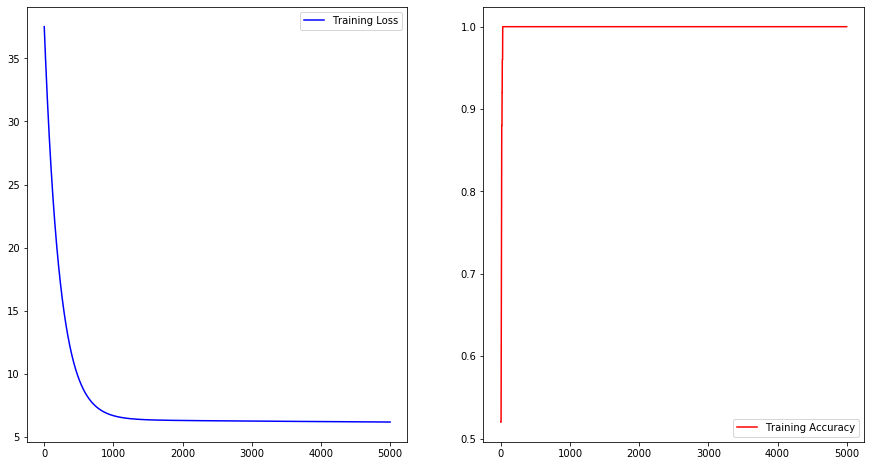

In [46]:
fig = plt.figure(figsize=[15,8])

ax1 = fig.add_subplot(121)
ax1.plot(trained_perceptron.history['loss'], label="Training Loss", color='b')
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(trained_perceptron.history['acc'], label="Training Accuracy", color='r')
ax2.legend()

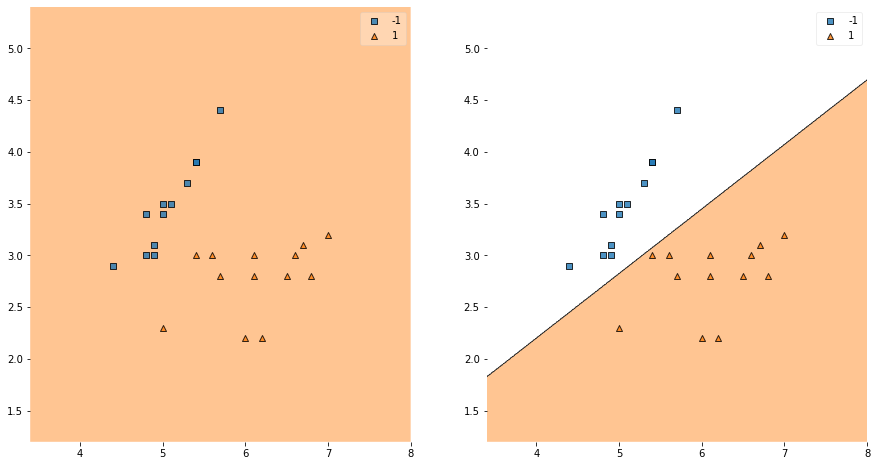

In [47]:
fig = plt.figure(figsize=[15,8])

ax1 = fig.add_subplot(121)
ax1 = plot_decision_regions(X_test, y_test, clf=un_trained_perceptron)


ax2 = fig.add_subplot(122)
ax2 = plot_decision_regions(X_test, y_test, clf=trained_perceptron)

In [48]:
print(trained_perceptron.history['acc'][-1], trained_perceptron.history['loss'][-1])

1.0 6.188394468329506
